## TCS STOCK DATA

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import sklearn
#import sys
#!{sys.executable} -m pip install tensorflow
#import tensorflow as tf
#from sklearn.metrics import mean_absolute_error
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import LSTM, Dense
#from tqdm import tqdm





In [16]:
#loading Data..
TCS=pd.read_csv("E://projects unified mentor//tcs stock data//TCS_stock_history.csv")
TCS.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0


In [20]:
TCS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4463 entries, 0 to 4462
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          4463 non-null   object 
 1   Open          4463 non-null   float64
 2   High          4463 non-null   float64
 3   Low           4463 non-null   float64
 4   Close         4463 non-null   float64
 5   Volume        4463 non-null   int64  
 6   Dividends     4463 non-null   float64
 7   Stock Splits  4463 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 279.1+ KB


In [25]:
TCS.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

In [22]:
TCS["Date"] = pd.to_datetime(TCS["Date"])
TCS = TCS.sort_values(by="Date")

In [24]:
TCS.describe()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,4463,4463.000000,4463.000000,4463.000000,4463.000000,4.463000e+03,4463.000000,4463.000000
mean,2012-08-23 19:22:31.109119488,866.936239,876.675013,856.653850,866.537398,3.537876e+06,0.071533,0.001344
min,2002-08-12 00:00:00,24.146938,27.102587,24.146938,26.377609,0.000000e+00,0.000000,0.000000
25%,2008-02-14 12:00:00,188.951782,191.571816,185.979417,188.594620,1.860959e+06,0.000000,0.000000
50%,2012-09-04 00:00:00,530.907530,534.751639,525.616849,529.713257,2.757742e+06,0.000000,0.000000
75%,2017-03-22 12:00:00,1156.462421,1165.815854,1143.622800,1154.784851,4.278625e+06,0.000000,0.000000
max,2021-09-30 00:00:00,3930.000000,3981.750000,3892.100098,3954.550049,8.806715e+07,40.000000,2.000000
std,NaN,829.905368,838.267104,821.233477,829.611313,3.273531e+06,0.965401,0.051842


In [26]:
#Correlation Of Features
corel=TCS.corr()
corel

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,1.000000,0.899114,0.899354,0.898962,0.899214,-0.177351,0.062321,-0.005701
Open,0.899114,1.000000,0.999888,0.999892,0.999787,-0.153362,0.059743,-0.006715
High,0.899354,0.999888,1.000000,0.999867,0.999914,-0.150918,0.060044,-0.006597
Low,0.898962,0.999892,0.999867,1.000000,0.999901,-0.154962,0.059916,-0.006622
Close,0.899214,0.999787,0.999914,0.999901,1.000000,-0.152844,0.060179,-0.006635
Volume,-0.177351,-0.153362,-0.150918,-0.154962,-0.152844,1.000000,-0.010332,0.004752
Dividends,0.062321,0.059743,0.060044,0.059916,0.060179,-0.010332,1.000000,0.142493
Stock Splits,-0.005701,-0.006715,-0.006597,-0.006622,-0.006635,0.004752,0.142493,1.000000


In [28]:
# Correlation of features with the target variable (Close Price)
correlation_with_close=TCS.corr()["Close"].sort_values(ascending=False)
print(correlation_with_close)

Close           1.000000
High            0.999914
Low             0.999901
Open            0.999787
Date            0.899214
Dividends       0.060179
Stock Splits   -0.006635
Volume         -0.152844
Name: Close, dtype: float64


# Exploratory Data Analysis

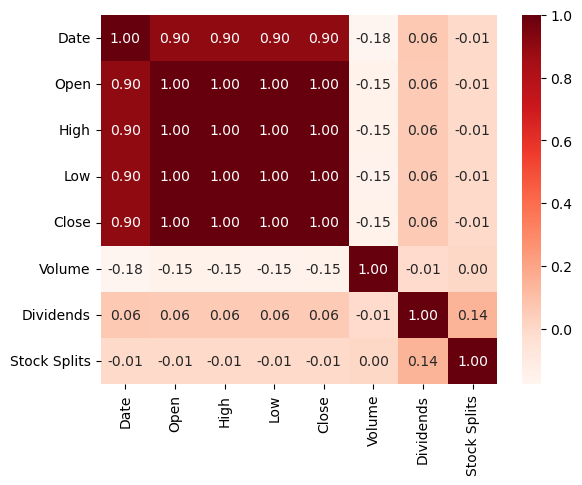

In [30]:
 sns.heatmap(corel,annot= True,cmap= "Reds",fmt=".2f")
 plt.show()

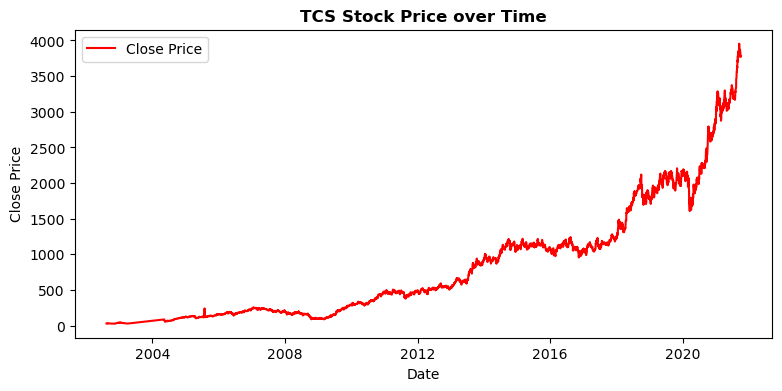

In [76]:
 #Time series of stock prices
plt.figure(figsize=(9, 4))
plt.plot(TCS["Date"], TCS["Close"], label="Close Price",
color="r")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("TCS Stock Price over Time",weight = "bold")
plt.legend()


 Volume, Dividends, Stock Splits

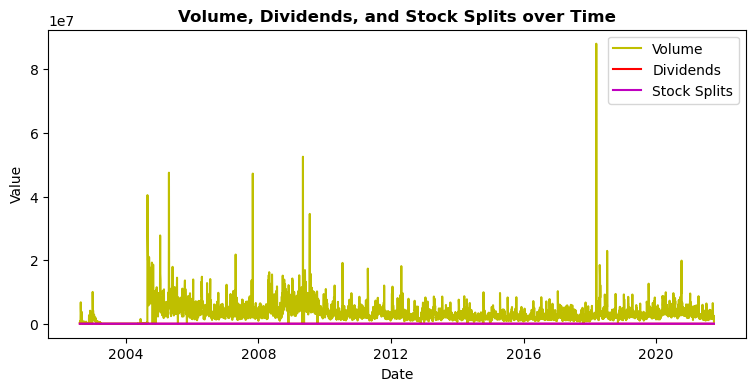

In [82]:
plt.figure(figsize=(9, 4))
plt.plot(TCS["Date"],TCS["Volume"], label="Volume", color="y")
plt.plot(TCS["Date"],TCS["Dividends"], label="Dividends",color="r")
plt.plot(TCS["Date"],TCS["Stock Splits"], label="Stock Splits",color="m")
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Volume, Dividends, and Stock Splits over Time",weight = "bold")
plt.legend()
plt.show()

Close vs Volume

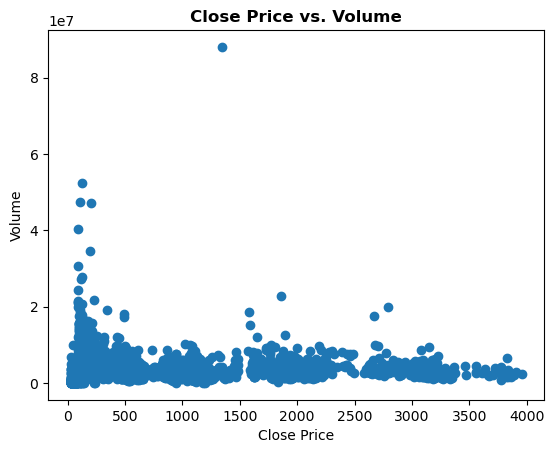

In [85]:
plt.scatter(TCS["Close"],TCS["Volume"])
plt.xlabel("Close Price")
plt.ylabel("Volume")
plt.title("Close Price vs. Volume",weight= "bold")
plt.show()


Dividends and Stock Splits

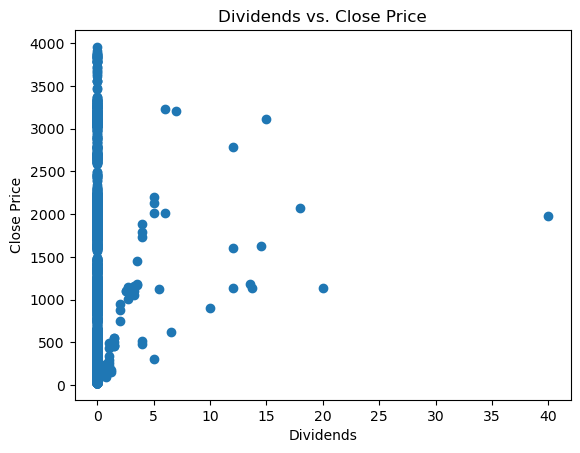

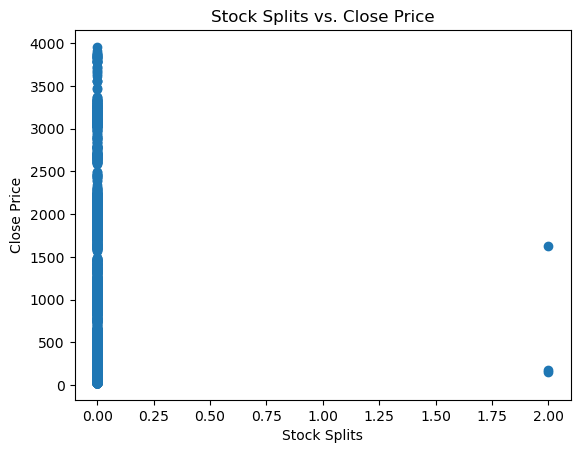

In [92]:
 # Dividends vs. Close Price
plt.scatter(TCS["Dividends"], TCS["Close"])
plt.xlabel("Dividends")
plt.ylabel("Close Price")
plt.title("Dividends vs. Close Price")
plt.show()
# Stock Splits vs. Close Price
plt.scatter(TCS["Stock Splits"], TCS["Close"])
plt.xlabel("Stock Splits")
plt.ylabel("Close Price")
plt.title("Stock Splits vs. Close Price")
plt.show()



Moving Averages

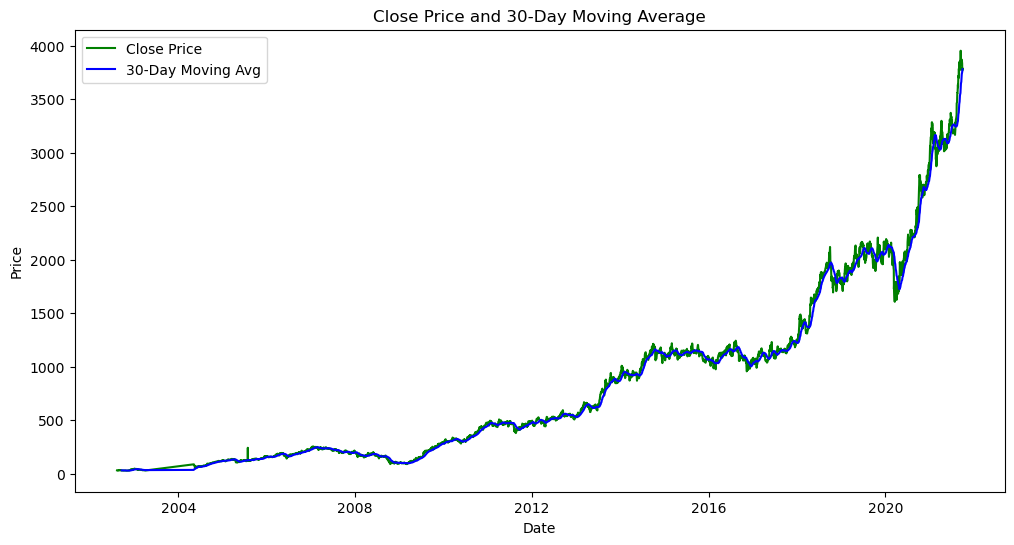

In [99]:
TCS["30-Day Moving Avg"] = TCS["Close"].rolling(window=30).mean()
# Plot Close price and moving average
plt.figure(figsize=(12, 6))
plt.plot(TCS["Date"],TCS["Close"], label="Close Price",color="g")
plt.plot(TCS["Date"],TCS["30-Day Moving Avg"], label="30-Day Moving Avg", color="b")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Close Price and 30-Day Moving Average")
plt.legend()
plt.show()

Moving Average Crossover Strategy

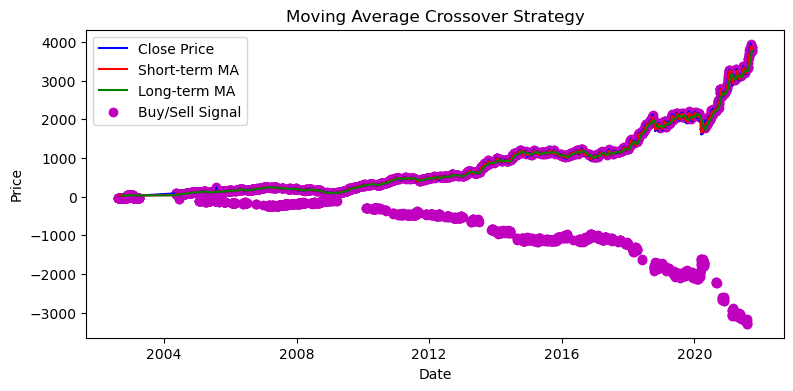

In [106]:
TCS["Short_MA"] = TCS["Close"].rolling(window=5).mean()
TCS["Long_MA"] = TCS["Close"].rolling(window=30).mean()
# Creating a trading signals based on moving average crossovers
TCS["Signal"] = np.where(TCS["Short_MA"] > TCS["Long_MA"], 1,-1)
# Plot the strategy signals
plt.figure(figsize=(9, 4))
plt.plot(TCS["Date"],TCS["Close"],label="Close Price",color="b")
plt.plot(TCS["Date"], TCS["Short_MA"], label="Short-term MA",color="r")
plt.plot(TCS["Date"], TCS["Long_MA"], label="Long-term MA",color="g")
plt.scatter(TCS["Date"], TCS["Close"] * TCS["Signal"],
label="Buy/Sell Signal", marker="o", color="m")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Moving Average Crossover Strategy")
plt.legend()
plt.show()


Daily Price Change

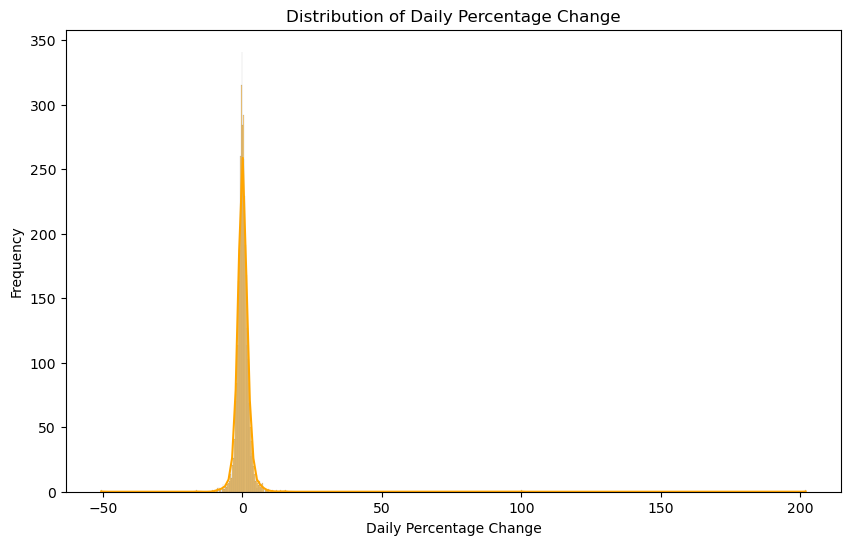

In [111]:
TCS["Daily_Price_Change"] = TCS["Close"].pct_change() * 100
# Distribution of daily percentage change
plt.figure(figsize=(10, 6))
sns.histplot(TCS["Daily_Price_Change"].dropna(), kde=True,
color="orange")
plt.xlabel("Daily Percentage Change")
plt.ylabel("Frequency")
plt.title("Distribution of Daily Percentage Change")
plt.show()


## Feature Engineering

In [145]:
TCS["Moving_Avg_Close"] = TCS["Close"].rolling(window=7).mean()


Modelling

In [142]:
 TCS.shape

(4463, 14)

Data Preparation & Normalization

In [147]:
TCS.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,30-Day Moving Avg,Short_MA,Long_MA,Signal,Daily_Price_Change,Moving_Avg_Close
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0,NaN,NaN,NaN,-1,NaN,NaN
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0,NaN,NaN,NaN,-1,-1.353915,NaN
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0,NaN,NaN,NaN,-1,-6.894351,NaN
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0,NaN,NaN,NaN,-1,0.000000,NaN
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0,NaN,27.981837,NaN,-1,-0.239988,NaN


In [35]:
 # Prepare the data for LSTM
 X_train = TCS["Close"].values.reshape(-1, 1)
 y_train = TCS["Close"].shift(-1).dropna().values

# Normalize the data
 from sklearn.preprocessing import MinMaxScaler
 scaler = MinMaxScaler()
 X_train_scaled = scaler.fit_transform(X_train)

# Define the test data
 test_ratio = 0.2
 test_size = int(len(TCS) * test_ratio)
 test_data = TCS[-test_size:]
 
# Prepare the data for prediction
 X_test = test_data["Close"].values.reshape(-1, 1)
 X_test_scaled = scaler.transform(X_test)
 X_test_lstm = X_test_scaled.reshape(-1, 1, 1)

 

## Reshaping Data